# Plot alignment statistics of barcode library

## Load libraries and define analysis-specific parameters

In [2]:
suppressMessages(library(Biostrings))
suppressMessages(library(plyranges))
suppressMessages(library(tidyverse))
suppressMessages(library(rasilabRtemplates))

## Read alignment log

- It's fairly clear that the alignment worked for the gRNA and mRNA samples, but not for the timecourse samples. 

- I beleive these samples were generated in different sequencing runs, so that's not a surprise. I think I just need to go back and adjust the trim parameters for the timecourse samples. 

In [3]:
align_log <- list.files("../data/alignments/", pattern = "*.log", full.names = T) %>% 
  enframe("sno", "file") %>% 
  mutate(log = map(file, readLines)) %>% 
  mutate(sample_name = str_extract(file, "[^/]+(?=.bowtie2.log)")) %>% 
  select(-sno, -file) %>% 
  unnest() 

align_log  

Warning message:
“`cols` is now required when using unnest().
Please use `cols = c(log)`”


log,sample_name
<chr>,<chr>
1183625 reads; of these:,stall4control4_grna_barcode_1
1183625 (100.00%) were unpaired; of these:,stall4control4_grna_barcode_1
420532 (35.53%) aligned 0 times,stall4control4_grna_barcode_1
747639 (63.17%) aligned exactly 1 time,stall4control4_grna_barcode_1
15454 (1.31%) aligned >1 times,stall4control4_grna_barcode_1
⋮,⋮
4168876 (100.00%) were unpaired; of these:,stall4control4_t6_barcode_1
3994540 (95.82%) aligned 0 times,stall4control4_t6_barcode_1
168737 (4.05%) aligned exactly 1 time,stall4control4_t6_barcode_1


##  How many total reads and reads with expected barcodes?


── Column specification ────────────────────────────────────────────────────────
cols(
  sample_name = col_character(),
  type = col_character(),
  count = col_double()
)



# A tibble: 24 × 4
   sample_name                   read  type      count
   <chr>                         <chr> <chr>     <dbl>
 1 stall4control4_grna_barcode_1 total all     1183625
 2 stall4control4_grna_barcode_1 aln   unique   747639
 3 stall4control4_grna_barcode_1 aln   multi     15454
 4 stall4control4_mrna_barcode_1 total all      980084
 5 stall4control4_mrna_barcode_1 aln   unique   660279
 6 stall4control4_mrna_barcode_1 aln   multi     13042
 7 stall4control4_t0_barcode_1   total all    16648047
 8 stall4control4_t0_barcode_1   aln   unique   194790
 9 stall4control4_t0_barcode_1   aln   multi      9344
10 stall4control4_t0.5_barcode_1 total all    14742885
# … with 14 more rows


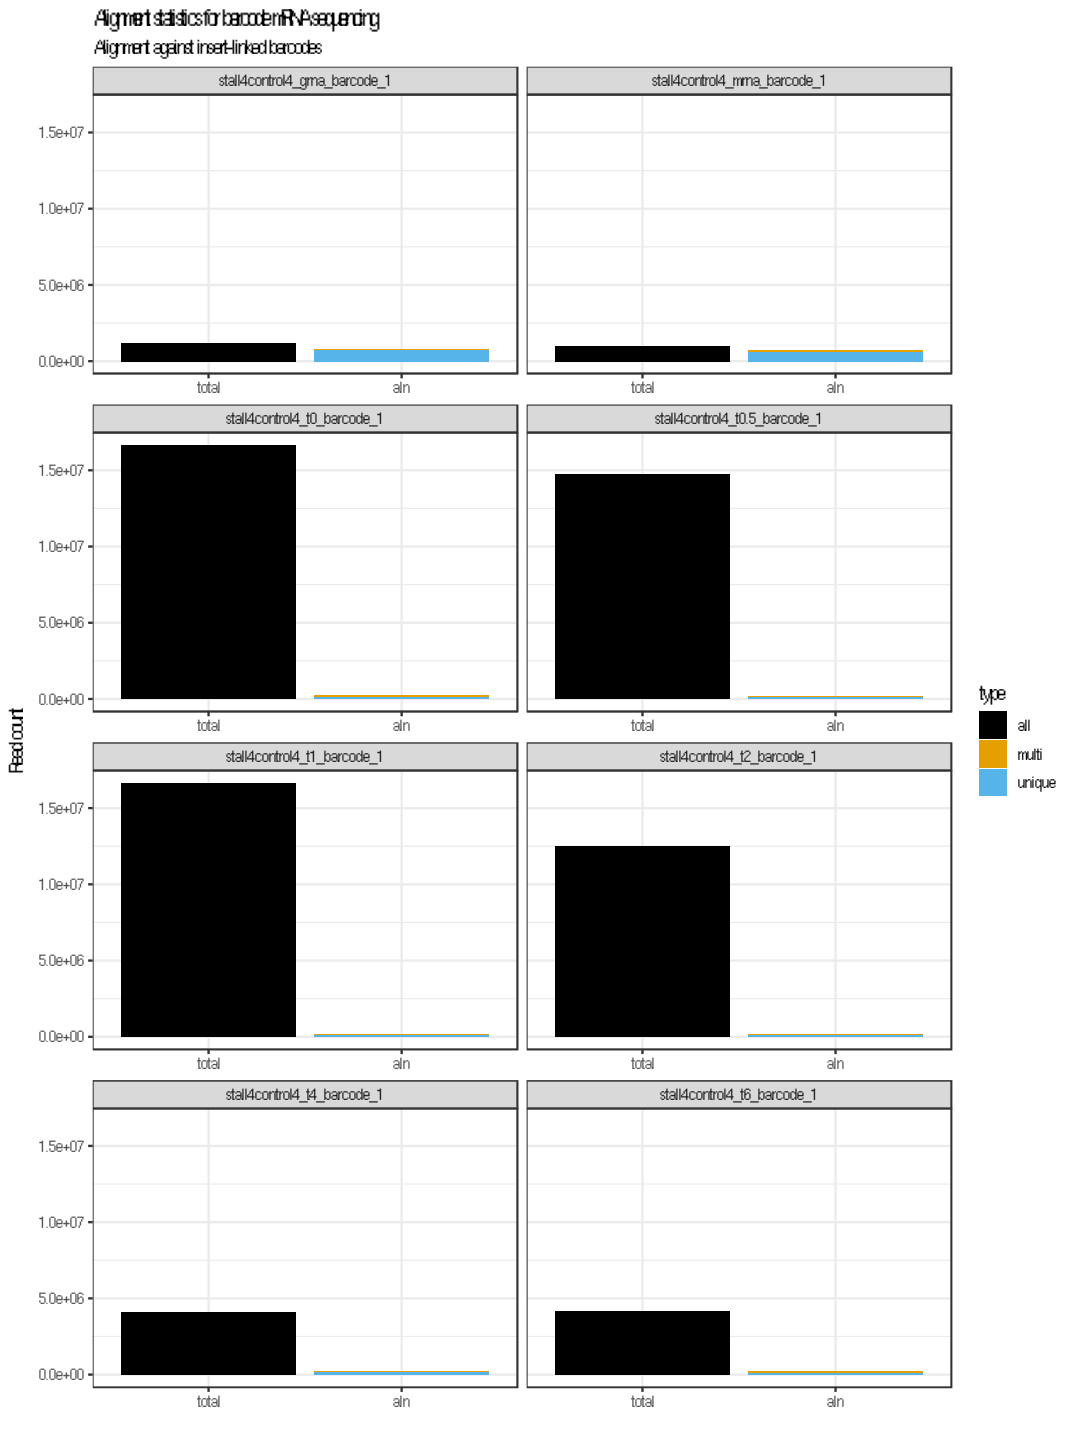

In [4]:
options(repr.plot.width=9, repr.plot.height=12)

plot_data <- align_log %>% 
  mutate(total_all = str_extract(log, "^[:digit:]+(?= reads;)")) %>% 
  mutate(aln_unique = str_extract(log, "[:digit:]+(?=.+exactly)")) %>% 
  mutate(aln_multi = str_extract(log, "[:digit:]+(?=.+>1)")) %>% 
  select(-log) %>% 
  pivot_longer(-sample_name, names_to = 'type', values_to = 'count') %>% 
  filter(!is.na(count)) %>% 
  type_convert() %>% 
  separate(type, c("read", "type")) %>% 
  print()

plot_data %>% 
  ggplot(aes(x = fct_rev(read), y = count, fill = type)) +
  facet_wrap(~sample_name, ncol = 2, scales = "free_x") +
  geom_col() +
  ggthemes::scale_fill_colorblind() +
  theme_bw() +
  labs(x = "", y = "Read count",
       title = "Alignment statistics for barcode mRNA sequencing",
       subtitle = "Alignment against insert-linked barcodes")

# Get read counts for each barcode

In [20]:

barcode_counts <- list.files("../data/barcode_counts/", pattern = ".tsv.gz$", full.names = T) %>% 
  enframe("sno", "file") %>% 
  mutate(counts = map(file, read_tsv)) %>% 
  mutate(sample_name = str_extract(file, "[^/]+(?=.tsv.gz)")) %>% 
  select(-sno, -file) %>% 
  unnest() %>% 
  rename(barcode_count = count, barcode_num = barcode) %>% 
  mutate(sample_name = str_extract(sample_name, ".+(?=_barcode)")) %>%
  print()

Rows: 6289 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (2): barcode, count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 5646 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (2): barcode, count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2702 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (2): barcode, count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2637 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Del

# A tibble: 27,840 × 3
   barcode_num barcode_count sample_name        
         <dbl>         <dbl> <chr>              
 1       12338          2551 stall4control4_grna
 2        7889          1779 stall4control4_grna
 3        7888          1628 stall4control4_grna
 4        7909          1107 stall4control4_grna
 5       10487          1041 stall4control4_grna
 6        7899          1000 stall4control4_grna
 7        7845           970 stall4control4_grna
 8        8016           941 stall4control4_grna
 9       11819           938 stall4control4_grna
10        7208           934 stall4control4_grna
# … with 27,830 more rows


### Get insert-barcode linkages

- Of note, we lose the SKVF control (insert #1) at some point. Is it already missing at this stage?  

- Yeah, it's already missing. So it's not in the insert_barcode_linkages stall4control4.tsv.gz file. This was generated in the "merge_insert_barcode_linkages" script.  

In [4]:

insert_barcode_linkages <- list.files("../annotations/insert_barcode_linkages/", 
                                      pattern = "stall4control4.tsv.gz$", full.names = T) %>% 
  enframe("sno", "file") %>% 
  mutate(counts = map(file, read_tsv)) %>% 
  mutate(sample_name = str_extract(file, "[^/]+(?=.tsv.gz)")) %>% 
  select(-sno, -file) %>% 
  unnest() %>% 
  rename(linkage_count = read_count, linkage_ref = sample_name) %>% 
  print()

insert_barcode_linkages %>% filter(insert_num == 1) %>% print   

Rows: 12519 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): barcode_1
dbl (4): insert_num, barcode_num, read_count, pool

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“`cols` is now required when using unnest().
Please use `cols = c(counts)`”


# A tibble: 12,519 × 6
   insert_num barcode_num barcode_1                linkage_count  pool linkage…¹
        <dbl>       <dbl> <chr>                            <dbl> <dbl> <chr>    
 1          7           1 GATCACCCCGTGGTTTGCAGTTCG          1592     1 stall4co…
 2          5           2 CCGACTCTGGTTTATGCTCGTTAG           902     1 stall4co…
 3          7           3 TACTAGCAGTGGATCTATTTTGAG           590     1 stall4co…
 4          7           4 TCCCGTTGTGTGGGGTTCGCGGGT           588     1 stall4co…
 5          7           5 GGTATTTACCCTCAGTGTGTCCTG           525     1 stall4co…
 6          7           6 GCCTTCGATCTGCGGGCATCGTTG           521     1 stall4co…
 7          4           7 GATTGTGTCTATAGGGGGTTTGCC           480     1 stall4co…
 8          4           8 GGTGTTGGTTCGGCTTTCGGCTTC           479     1 stall4co…
 9          7           9 GGCCGTGCTCGTAGTCGCGGGGAT           475     1 stall4co…
10          5          10 CTCATGACCGGCGATAATGGGAGG           469     1 stall4co…
# … w

# Get sample annotations

In [22]:

sample_annotations <- read_csv("../annotations/sample_annotations.csv", comment = "#") %>% 
  print()

celllines <- read_csv("../annotations/cellline_annotations.csv") %>% 
  print()

Rows: 8 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): owner, sample_name, plasmid, library_type, sample_id, linkage_ref
dbl (5): barcode1_read, barcode1_start, barcode1_length, barcode1_trim5, bar...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 8 × 11
  owner sample…¹ plasmid libra…² sampl…³ barco…⁴ barco…⁵ barco…⁶ linka…⁷ barco…⁸
  <chr> <chr>    <chr>   <chr>   <chr>     <dbl>   <dbl>   <dbl> <chr>     <dbl>
1 pb    stall4c… pPBHS4… grna    146p9         1       0      24 stall4…       0
2 pb    stall4c… pPBHS4… mrna    146p10        1       0      24 stall4…       0
3 pb    stall4c… pPBHS4… mrna    146p11        1       0      24 stall4…       0
4 pb    stall4c… pPBHS4… mrna    146p12        1       0      24 stall4…       0
5 pb    stall4c… pPBHS4… mrna    146p13        1       0      24 stall4…       0
6 pb    stall4c… pPBHS4… mrna    146p14        1       0      24 stall4…       0
7 pb    stall4c… pPBHS4… mrna    146p15        1       0      24 stall4…       0
8 pb    stall4c… pPBHS4… mrna    146p16        1       0      24 stall4…       0
# … with 1 more variable: barcode1_trim3 <dbl>, and abbreviated variable names
#   ¹​sample_name, ²​library_type, ³​sample_id, ⁴​barcode1_read, ⁵​barcode1_start,
#   ⁶​bar

Rows: 4 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): cellline
dbl (1): pool

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 4 × 2
   pool cellline
  <dbl> <chr>   
1     3 HEK293T 
2     4 HCT116  
3     5 HeLa    
4     6 K562    


# Combine barcodes counts with insert linkages

In [23]:

barcode_insert_counts <- barcode_counts %>% 
  left_join(select(sample_annotations, sample_name), by = "sample_name") %>%
  left_join(insert_barcode_linkages, by = c("barcode_num")) %>%
  left_join(celllines, by = "pool") %>% 
  print()

# A tibble: 27,840 × 9
   barcode_num barcode_c…¹ sampl…² inser…³ barco…⁴ linka…⁵  pool linka…⁶ celll…⁷
         <dbl>       <dbl> <chr>     <dbl> <chr>     <dbl> <dbl> <chr>   <chr>  
 1       12338        2551 stall4…       5 AGGCAT…       1     6 stall4… K562   
 2        7889        1779 stall4…       4 CGTATG…     303     5 stall4… HeLa   
 3        7888        1628 stall4…       5 TTGACT…     431     5 stall4… HeLa   
 4        7909        1107 stall4…       2 GCTTCG…     223     5 stall4… HeLa   
 5       10487        1041 stall4…       3 CAGTGT…     333     6 stall4… K562   
 6        7899        1000 stall4…       3 CTGTAT…     254     5 stall4… HeLa   
 7        7845         970 stall4…       7 GCTATT…       1     4 stall4… HCT116 
 8        8016         941 stall4…       5 AGTTAT…     151     5 stall4… HeLa   
 9       11819         938 stall4…       5 TTCGGT…       2     6 stall4… K562   
10        7208         934 stall4…       5 AGGCTG…       2     4 stall4… HCT116 
# … w

# Write barcode insert counts to a table for post-processing

In [24]:

barcode_insert_counts %>% 
  select(sample_name, cellline, pool, insert_num, barcode_num, barcode_count, linkage_count) %>% 
  write_tsv('../tables/sample_insert_barcode_counts.tsv.gz') %>% 
  print()

# A tibble: 27,840 × 7
   sample_name         cellline  pool insert_num barcode_num barcode_c…¹ linka…²
   <chr>               <chr>    <dbl>      <dbl>       <dbl>       <dbl>   <dbl>
 1 stall4control4_grna K562         6          5       12338        2551       1
 2 stall4control4_grna HeLa         5          4        7889        1779     303
 3 stall4control4_grna HeLa         5          5        7888        1628     431
 4 stall4control4_grna HeLa         5          2        7909        1107     223
 5 stall4control4_grna K562         6          3       10487        1041     333
 6 stall4control4_grna HeLa         5          3        7899        1000     254
 7 stall4control4_grna HCT116       4          7        7845         970       1
 8 stall4control4_grna HeLa         5          5        8016         941     151
 9 stall4control4_grna K562         6          5       11819         938       2
10 stall4control4_grna HCT116       4          5        7208         934       2
# … w

# Plot the number of barcodes per library

```{r,fig.width=4, fig.height=3}

`summarise()` has grouped output by 'sample_name', 'pool'. You can override
using the `.groups` argument.


# A tibble: 48 × 4
   sample_name         pool    cellline n_barcodes
   <chr>               <chr>   <chr>         <int>
 1 stall4control4_grna NA1     NA               46
 2 stall4control4_grna NA2     NA               61
 3 stall4control4_grna HEK293T HEK293T        1399
 4 stall4control4_grna HCT116  HCT116         1425
 5 stall4control4_grna HeLa    HeLa           1968
 6 stall4control4_grna K562    K562           1390
 7 stall4control4_mrna NA1     NA               35
 8 stall4control4_mrna NA2     NA               46
 9 stall4control4_mrna HEK293T HEK293T        1519
10 stall4control4_mrna HCT116  HCT116         1097
# … with 38 more rows


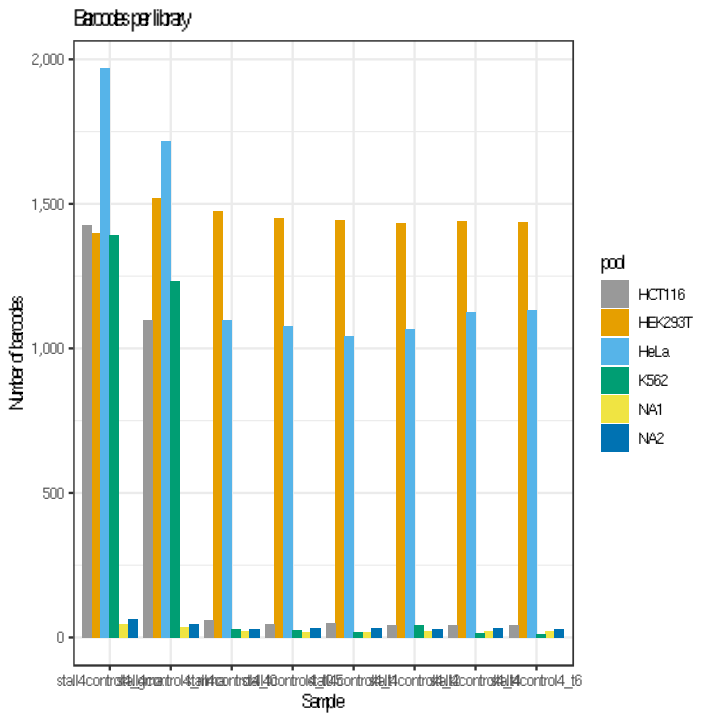

In [30]:
options(repr.plot.width=6, repr.plot.height=6)

plot_data <- barcode_insert_counts %>% 
  group_by(sample_name, pool, cellline) %>% 
  distinct(barcode_num) %>% 
  summarize(n_barcodes = dplyr::n()) %>% 
  ungroup() %>% 
  mutate(pool = if_else(is.na(cellline), paste0("NA", as.character(pool)), cellline)) %>% 
  print()

plot_data %>% 
  ggplot(aes(x = sample_name, y = n_barcodes, fill = pool)) +
  geom_col(position = "dodge") +
  theme_bw() +
  scale_y_continuous(labels = scales::comma) +
  # theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(x = "Sample", y = "Number of barcodes", title = "Barcodes per library", fill = "pool") +
  scale_fill_manual(values = cbPalette) +
  NULL

# ggsave("../figures/20210903_barcodes_per_library.pdf")


# Plot CDF of the number of reads per barcode
```{r,fig.width=6, fig.height=3}

# A tibble: 27,360 × 9
   barcode_num barcode_count sampl…¹ inser…² barco…³ linka…⁴  pool linka…⁵ xaxis
         <dbl>         <dbl> <chr>     <dbl> <chr>     <dbl> <dbl> <chr>   <int>
 1       10186          2946 HeLa_s…       3 ACGAGC…       1     5 stall4…     1
 2        3617          2924 HEK293…       7 CTTCTT…     279     3 stall4…     1
 3        3640          2616 HEK293…       7 GGCATT…     228     3 stall4…     2
 4        3630          2591 HEK293…       7 TATTGC…     243     3 stall4…     3
 5       12338          2551 K562_s…       5 AGGCAT…       1     6 stall4…     1
 6        3662          1948 HEK293…       7 CTGTGT…     207     3 stall4…     4
 7        3604          1927 HEK293…       5 TGTGAG…     354     3 stall4…     5
 8        3626          1924 HEK293…       7 CACAGT…     253     3 stall4…     6
 9        3686          1903 HEK293…       7 CGTATC…     184     3 stall4…     7
10        3638          1897 HEK293…       7 TCGAGG…     231     3 stall4…     8
# … w

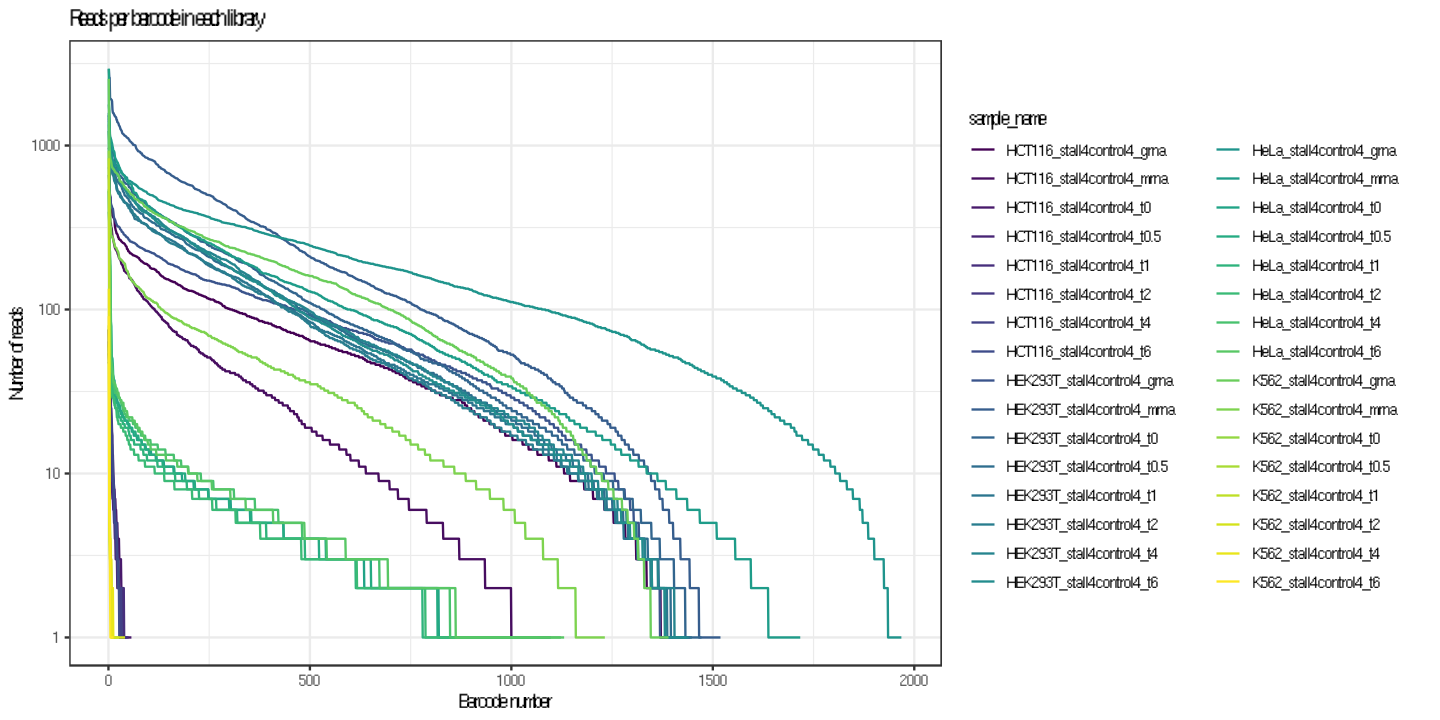

In [32]:
options(repr.plot.width=12, repr.plot.height=6)

plot_data <- barcode_insert_counts %>% 
  filter(!is.na(cellline)) %>% 
  group_by(sample_name, pool) %>% 
  arrange(-barcode_count) %>% 
  mutate(xaxis = 1:(dplyr::n())) %>% 
  ungroup() %>% 
  unite(sample_name, cellline, sample_name) %>% 
  print()

plot_data %>% 
  ggplot(aes(x = xaxis, y = barcode_count, color = sample_name)) +
  geom_line(aes(group = sample_name)) +
  theme_bw() +
  scale_y_log10() +
  scale_color_viridis_d() +
  labs(x = "Barcode number", y = "Number of reads",
       title = "Reads per barcode in each library") +
  NULL

#ggsave("../figures/20210903_cdf_reads_per_barcode.pdf")

# Plot CDF of the number of reads per insert, summed over barcodes
```{r,fig.width=4, fig.height=3}

`summarise()` has grouped output by 'sample_name'. You can override using the
`.groups` argument.


# A tibble: 211 × 4
   sample_name                 insert_num read_count xaxis
   <chr>                            <dbl>      <dbl> <int>
 1 HEK293T_stall4control4_mrna          7     126180     1
 2 HEK293T_stall4control4_mrna          5     118638     2
 3 HeLa_stall4control4_grna             5     105818     1
 4 HeLa_stall4control4_mrna             5      93024     1
 5 HEK293T_stall4control4_mrna          3      77733     3
 6 HEK293T_stall4control4_t0            7      66184     1
 7 HeLa_stall4control4_grna             2      60196     2
 8 HEK293T_stall4control4_t4            7      60058     1
 9 HEK293T_stall4control4_t6            7      59216     1
10 HEK293T_stall4control4_t0            5      58369     2
# … with 201 more rows


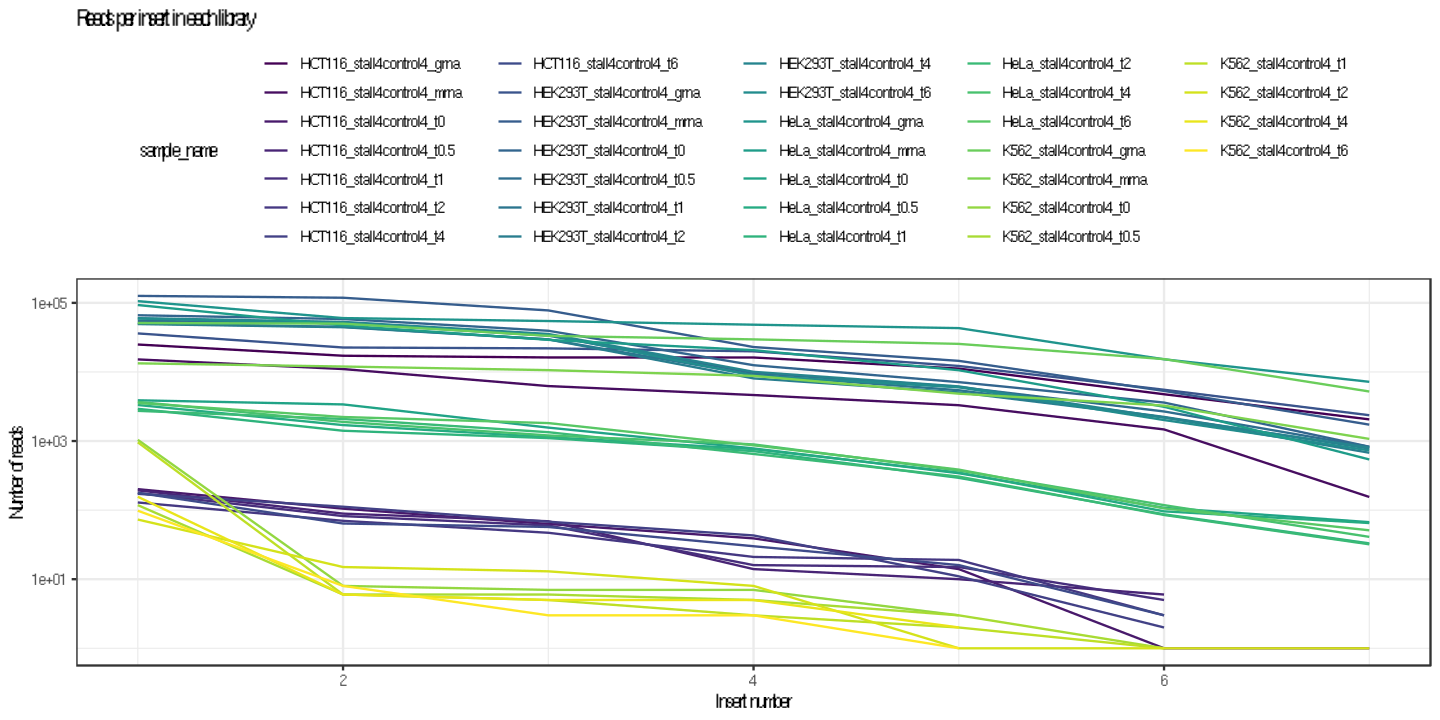

In [33]:

plot_data <- barcode_insert_counts %>% 
  filter(!is.na(cellline)) %>% 
  unite(sample_name, cellline, sample_name) %>% 
  group_by(sample_name, insert_num) %>% 
  summarize(read_count = sum(barcode_count)) %>% 
  ungroup() %>% 
  group_by(sample_name) %>% 
  arrange(-read_count) %>% 
  mutate(xaxis = 1:(dplyr::n())) %>% 
  ungroup() %>% 
  print()

plot_data %>% 
  ggplot(aes(x = xaxis, y = read_count, color = sample_name)) +
  geom_line(aes(group = sample_name)) +
  theme_bw() +
  theme(legend.position = "top") +
  scale_y_log10() +
  labs(x = "Insert number", y = "Number of reads",
       title = "Reads per insert in each library") +
  # scale_color_manual(values = cbPalette[1:3]) +
  scale_color_viridis_d() +
  NULL

# ggsave("../figures/20210903_cdf_reads_per_insert.pdf")

# Plot read counts of mRNA vs gRNA, summed for each insert

```{r,fig.width=4, fig.height=4}

In [35]:

plot_data <- barcode_insert_counts %>% 
  filter(!is.na(cellline)) %>% 
  group_by(sample_name, cellline, insert_num) %>% 
  summarize(read_count = sum(barcode_count)) %>% 
  ungroup() %>% 
  select(insert_num, read_count, sample_name, cellline) %>%
  pivot_wider(names_from = "sample_name", values_from = "read_count") %>%
  print()

plot_data %>%
  filter(!is.na(grna), !is.na(mrna)) %>%
  ggplot(aes(x = grna, y = mrna)) +
  facet_wrap(~cellline, ncol = 2) +
  geom_point() +
  theme_classic() +
  scale_x_log10() +
  scale_y_log10() +
  labs(x = "gRNA", y = "mRNA",
       title = "Summed Read Counts per Insert") +
  NULL

#ggsave("../figures/20210903_read_counts_summed_over_each_insert.pdf")


`summarise()` has grouped output by 'sample_name', 'cellline'. You can override
using the `.groups` argument.


# A tibble: 28 × 10
   insert_num cellline stall4c…¹ stall…² stall…³ stall…⁴ stall…⁵ stall…⁶ stall…⁷
        <dbl> <chr>        <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
 1          0 HCT116        2057     155       1       6       5       3       2
 2          2 HCT116       17166    3299      39      14      15      21      43
 3          3 HCT116       16212    6244     105      89      82      70     112
 4          4 HCT116       11189    4635      14      10      16      19      11
 5          5 HCT116       24943   15189     201     193     177     129     172
 6          6 HCT116        4757    1472       1      NA      NA      NA      NA
 7          7 HCT116       16195   11015      63      69      60      47      68
 8          0 HEK293T       2363    1727     827     823     778     677     802
 9          2 HEK293T      21956   22933   12518    9644    9112    8066   10040
10          3 HEK293T      22582   77733   39456   33522   29590   29589   35475
# … with

ERROR: [1m[33mError[39m in [1m[1m`filter()`:[22m
[1m[22m[33m![39m Problem while computing `..1 = !is.na(grna)`.
[1mCaused by error in [1m[1m`mask$eval_all_filter()`:[22m
[33m![39m object 'grna' not found
